In [1]:
# LOADING THE REQUIRED LIBRARIES
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#load the cifar10 dataset and split into training and testing
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#display shape of training and testing datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

#Labels of dataset
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer',
          'dog', 'frog', 'horse', 'ship', 'truck']

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [3]:
#Preprocessing the data

# Scaling the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Transforming target variable
y_categorical_train = to_categorical(y_train, 10)
y_categorical_test = to_categorical(y_test, 10)

In [6]:
#Builiding CNN model
model1 = Sequential()

#First convolutional layer
model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
# Pooling layer
model1.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model1.add(Dropout(0.25))

#Second convolutional layer
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

#Third convolutional layer
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1.add(BatchNormalization())
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))

#Fully connected layer
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.25))
model1.add(Dense(10, activation='softmax'))

metric = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
optimizer = Adam(learning_rate=0.001)
model1.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metric)

C:\Users\gomez\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#summary of CNN model
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,29

 Total params: 552,362 (2.11 MB)

 Trainable params: 551,466 (2.10 MB)

 Non-trainable params: 896 (3.50 KB)

In [8]:
#setting the batch size
batch_size = 32

#data augmentation using ImageDataGenerator
aug_data = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

#generate batches of augmented data using flow
batch_data = aug_data.flow(x_train, y_categorical_train, batch_size)

#number of steps for each epoch
steps_per_epoch = x_train.shape[0] // con

#training the model with the batch_data
r = model1.fit(batch_data,
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_categorical_test)
             )

Epoch 1/10


C:\Users\gomez\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 111s 68ms/step - accuracy: 0.3282 - loss: 1.9127 - precision: 0.5165 - recall: 0.1228 - val_accuracy: 0.4716 - val_loss: 1.5001 - val_precision: 0.6365 - val_recall: 0.3250
Epoch 2/10
   1/1562 ━━━━━━━━━━━━━━━━━━━━ 2:19 89ms/step - accuracy: 0.4375 - loss: 1.2634 - precision: 0.7222 - recall: 0.4062

C:\Users\gomez\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4375 - loss: 1.2634 - precision: 0.7222 - recall: 0.4062 - val_accuracy: 0.4766 - val_loss: 1.4815 - val_precision: 0.6476 - val_recall: 0.3260
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 109s 70ms/step - accuracy: 0.5394 - loss: 1.2928 - precision: 0.7081 - recall: 0.3598 - val_accuracy: 0.6278 - val_loss: 1.0589 - val_precision: 0.7429 - val_recall: 0.5131
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6562 - loss: 1.0826 - precision: 0.8421 - recall: 0.5000 - val_accuracy: 0.6287 - val_loss: 1.0676 - val_precision: 0.7385 - val_recall: 0.5145
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 608s 389ms/step - accuracy: 0.6265 - loss: 1.0689 - precision: 0.7677 - recall: 0.4926 - val_accuracy: 0.6687 - val_loss: 0.9744 - val_precision: 0.7809 - val_recall: 0.5781
Epoch 6/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6875 - loss: 1.0917 - precision: 0.6800 - recall: 0.5312 - val_accuracy: 0.6773 - val_lo

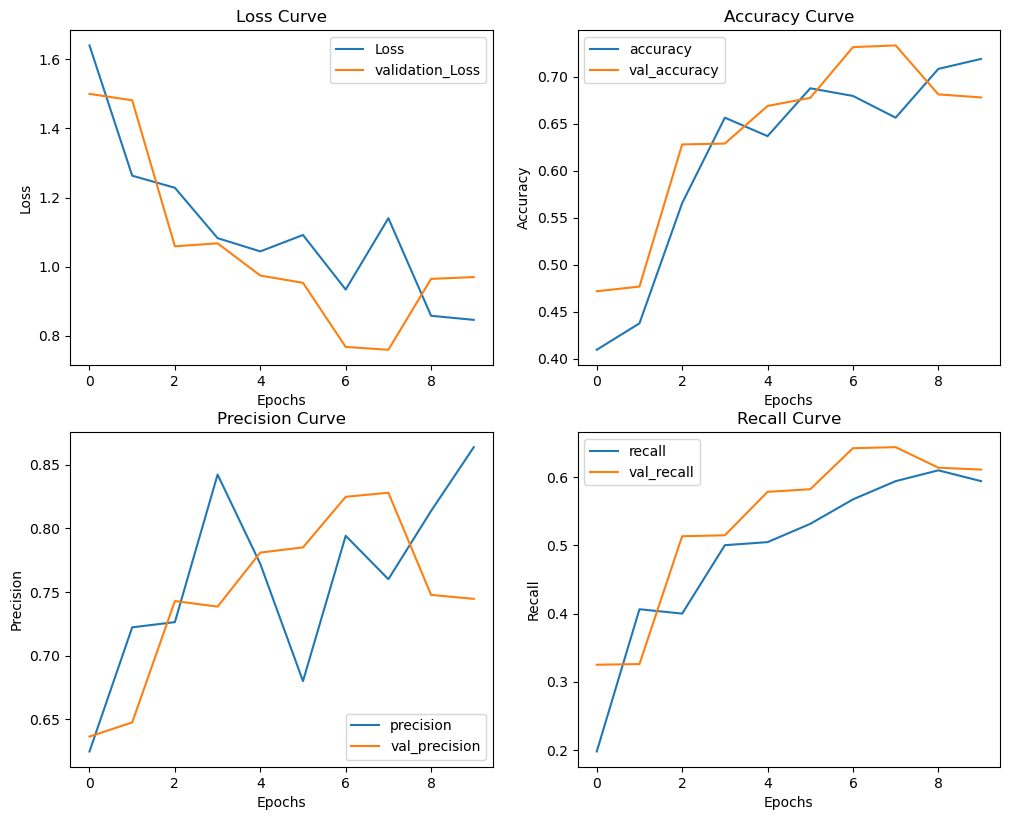

In [11]:
#setting the figure size
plt.figure(figsize=(12, 20))

#Loss vs Epoch
plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='validation_Loss')
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

#Accuracy vs Epoch
plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

#Precision vs Epoch
plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Curve')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend()

#Recall vs Epoch
plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Curve')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step


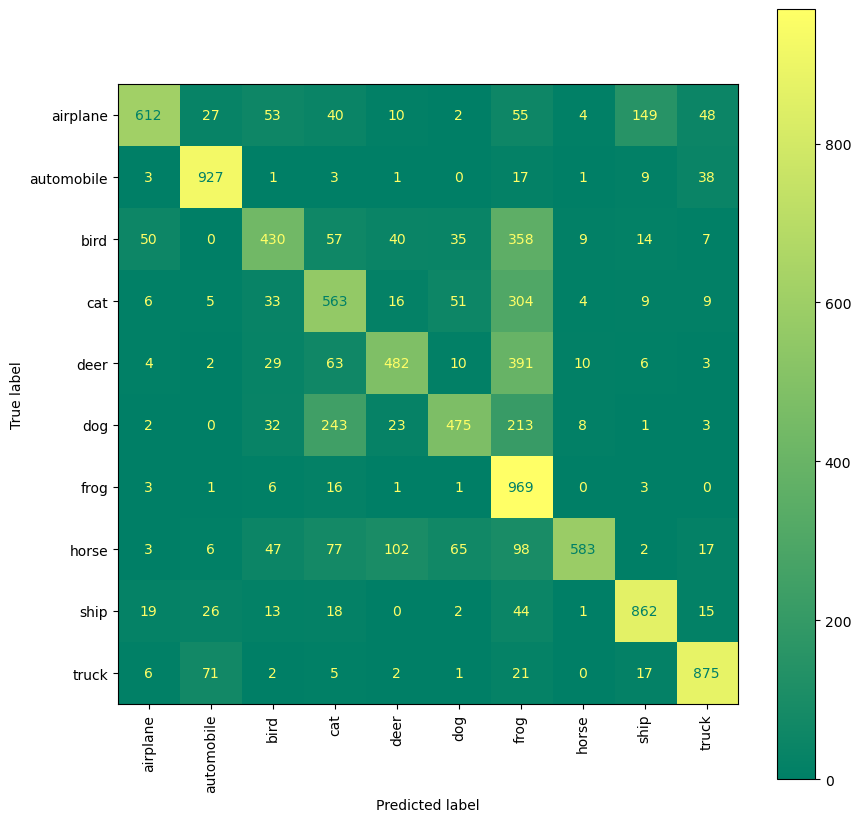

In [14]:
#use the model to predicts of test dataset
y_prediction = model1.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)

#confusion_matrix
conf_matrix = confusion_matrix(y_test, y_prediction)

#confusion matrix with labels
conf_matrix_with_labels = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=labels)



fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix_with_labels = conf_matrix_with_labels.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [19]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.86      0.61      0.72      1000
           1       0.87      0.93      0.90      1000
           2       0.67      0.43      0.52      1000
           3       0.52      0.56      0.54      1000
           4       0.71      0.48      0.57      1000
           5       0.74      0.47      0.58      1000
           6       0.39      0.97      0.56      1000
           7       0.94      0.58      0.72      1000
           8       0.80      0.86      0.83      1000
           9       0.86      0.88      0.87      1000

    accuracy                           0.68     10000
   macro avg       0.74      0.68      0.68     10000
weighted avg       0.74      0.68      0.68     10000



In [4]:
#hyperparameter optimization by changing learning

model1_opt = Sequential()

#First convolutional layer
model1_opt.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1_opt.add(BatchNormalization())
model1_opt.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1_opt.add(BatchNormalization())
# Pooling layer
model1_opt.add(MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model1_opt.add(Dropout(0.25))

#Second convolutional layer
model1_opt.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1_opt.add(BatchNormalization())
model1_opt.add(Conv2D(filters=64, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1_opt.add(BatchNormalization())
model1_opt.add(MaxPool2D(pool_size=(2, 2)))
model1_opt.add(Dropout(0.25))

#Third convolutional layer
model1_opt.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1_opt.add(BatchNormalization())
model1_opt.add(Conv2D(filters=128, kernel_size=(3, 3), input_shape=(32, 32, 3), activation='relu', padding='same'))
model1_opt.add(BatchNormalization())
model1_opt.add(MaxPool2D(pool_size=(2, 2)))
model1_opt.add(Dropout(0.25))

#Fully connected layer
model1_opt.add(Flatten())
model1_opt.add(Dense(128, activation='relu'))
model1_opt.add(Dropout(0.25))
model1_opt.add(Dense(10, activation='softmax'))

metric = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
optimizer = Adam(learning_rate=0.005)
model1_opt.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=metric)

C:\Users\gomez\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#setting the batch size
batch_size = 32

#split training data again for hyper parameter optimization
#data augmentation using ImageDataGenerator
aug_data = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)

#generate batches of augmented data using flow
batch_data = aug_data.flow(x_train, y_categorical_train, batch_size)

#number of steps for each epoch
steps_per_epoch = x_train.shape[0] // batch_size

#training the model with the batch_data
r = model1_opt.fit(batch_data,
              epochs=10,
              steps_per_epoch=steps_per_epoch,
              validation_data=(x_test, y_categorical_test)
             )


Epoch 1/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6807 - loss: 0.9496 - precision: 0.7983 - recall: 0.5687 - val_accuracy: 0.7237 - val_loss: 0.8570 - val_precision: 0.8154 - val_recall: 0.6280
Epoch 2/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6250 - loss: 0.9511 - precision: 0.8421 - recall: 0.5000 - val_accuracy: 0.7108 - val_loss: 0.8929 - val_precision: 0.8063 - val_recall: 0.6163
Epoch 3/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.6926 - loss: 0.9047 - precision: 0.8076 - recall: 0.5877 - val_accuracy: 0.7230 - val_loss: 0.8256 - val_precision: 0.7983 - val_recall: 0.6575
Epoch 4/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5625 - loss: 1.0764 - precision: 0.7143 - recall: 0.4688 - val_accuracy: 0.7291 - val_loss: 0.8106 - val_precision: 0.8026 - val_recall: 0.6654
Epoch 5/10
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 108s 69ms/step - accuracy: 0.7051 - loss: 0.8757 - precision: 0.8126 - recall: 0.6077 - val_accuracy: 0.

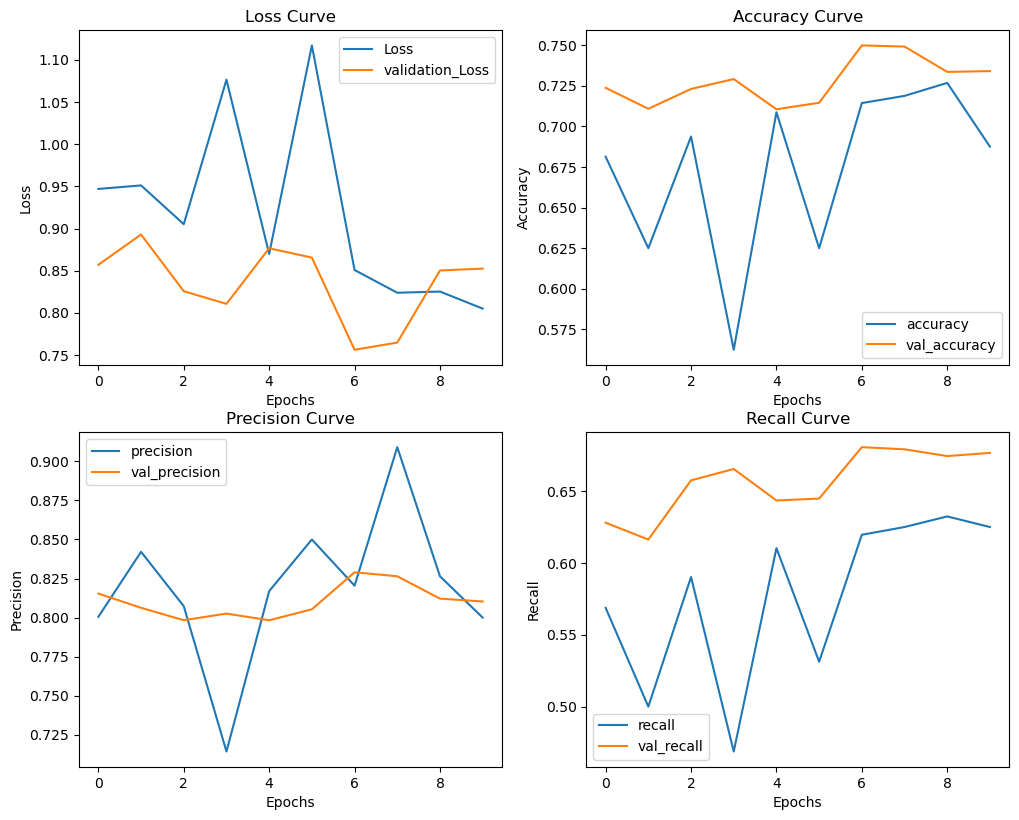

In [11]:
#setting the figure size
plt.figure(figsize=(12, 20))

#Loss vs Epoch
plt.subplot(4, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='validation_Loss')
plt.title('Loss Curve')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

#Accuracy vs Epoch
plt.subplot(4, 2, 2)
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Curve')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

#Precision vs Epoch
plt.subplot(4, 2, 3)
plt.plot(r.history['precision'], label='precision')
plt.plot(r.history['val_precision'], label='val_precision')
plt.title('Precision Curve')
plt.ylabel('Precision')
plt.xlabel('Epochs')
plt.legend()

#Recall vs Epoch
plt.subplot(4, 2, 4)
plt.plot(r.history['recall'], label='recall')
plt.plot(r.history['val_recall'], label='val_recall')
plt.title('Recall Curve')
plt.ylabel('Recall')
plt.xlabel('Epochs')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step


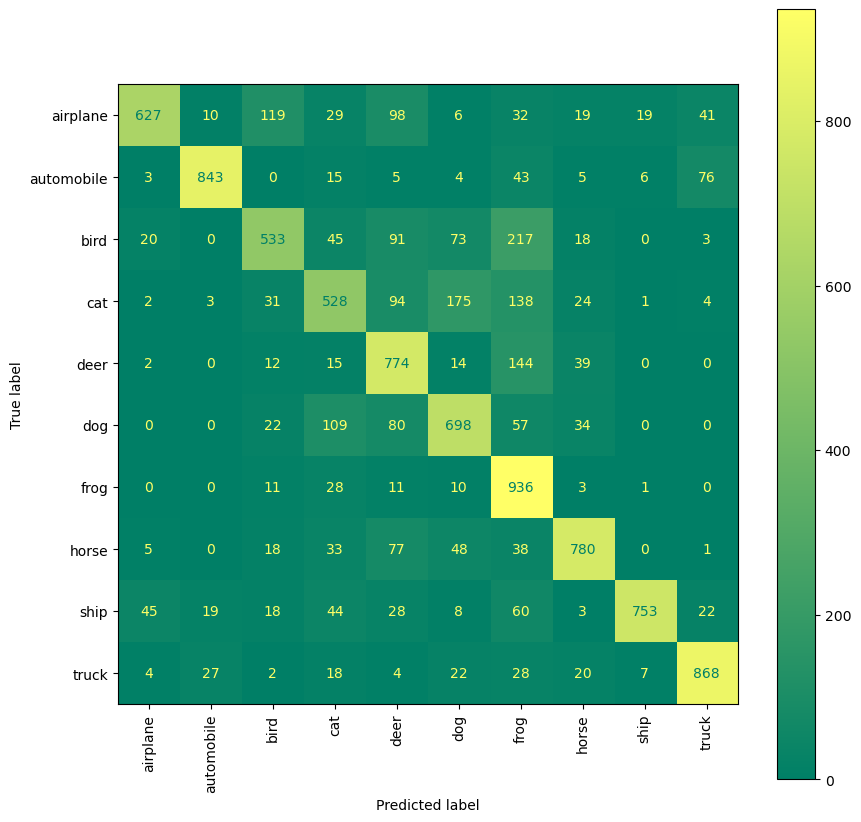

In [9]:
#use the model to predicts of test dataset
y_prediction = model1_opt.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=1)

#confusion_matrix
conf_matrix = confusion_matrix(y_test, y_prediction)

#confusion matrix with labels
conf_matrix_with_labels = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=labels)



fig, ax = plt.subplots(figsize=(10, 10))
conf_matrix_with_labels = conf_matrix_with_labels.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

In [10]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.89      0.63      0.73      1000
           1       0.93      0.84      0.89      1000
           2       0.70      0.53      0.60      1000
           3       0.61      0.53      0.57      1000
           4       0.61      0.77      0.68      1000
           5       0.66      0.70      0.68      1000
           6       0.55      0.94      0.70      1000
           7       0.83      0.78      0.80      1000
           8       0.96      0.75      0.84      1000
           9       0.86      0.87      0.86      1000

    accuracy                           0.73     10000
   macro avg       0.76      0.73      0.74     10000
weighted avg       0.76      0.73      0.74     10000

